# NBA Graph Project - Matthew Merritt
The goal of the project is to create a graph representing the victory of teams over another using a connected directional graph. Each node represents a team and an arrow pointing from team A to team B represent team A's victory over team B. The definition of victory in this case is that a team has more wins against the other team - there are no arrows for ties. 

## Notes
- Does not add ties to adjacency matrix
- In this program, 3 teams that are normally apart of the NBA lineup are removed for a more visible graph. The teams are
    - Utah Jazz, Washington Wizards, and Oklahoma City Thunder
- Data was provided by [Basketball-Reference.com](https://www.basketball-reference.com/) and is from November 2019

In [477]:
# Import Libraries
from sortedcontainers import SortedSet
import csv
import matplotlib
import networkx as nx
import numpy as np
import pandas as pd
import pylab as plt

In [478]:
# Window Setup
from matplotlib.pyplot import figure

In [479]:
# Gather Data
csvFile = "NBA2019-2020NovemberLog.csv"
data = pd.read_csv(csvFile);
data

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 5,Unnamed: 6,Attend.,Notes
0,7:00p,Houston Rockets,116,Brooklyn Nets,123,Box Score,NaN,17732,NaN
1,7:00p,Cleveland Cavaliers,95,Indiana Pacers,102,Box Score,NaN,16079,NaN
2,7:00p,Milwaukee Bucks,123,Orlando Magic,91,Box Score,NaN,15105,NaN
3,7:30p,New York Knicks,102,Boston Celtics,104,Box Score,NaN,18624,NaN
4,8:00p,Detroit Pistons,106,Chicago Bulls,112,Box Score,NaN,20671,NaN
...,...,...,...,...,...,...,...,...,...
210,10:30p,Washington Wizards,103,Los Angeles Lakers,125,Box Score,NaN,18997,NaN
211,5:00p,Denver Nuggets,97,Sacramento Kings,100,Box Score,OT,17583,NaN
212,7:00p,Indiana Pacers,116,Philadelphia 76ers,119,Box Score,NaN,20517,NaN
213,8:00p,Atlanta Hawks,111,Houston Rockets,158,Box Score,NaN,18055,NaN


In [480]:
# Create sorted set of teams
teamsSortedSet = SortedSet()
with open(csvFile, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        teamsSortedSet.add(row[1])
len(teamsSortedSet)

teamsSortedSet.discard("Visitor/Neutral")

In [481]:
# Removal of teams for graph visibility
teamsSortedSet.discard("Utah Jazz")
teamsSortedSet.discard("Washington Wizards")
teamsSortedSet.discard("Oklahoma City Thunder")


In [482]:
# Create adjacency matrix of wins per team against eachother
teamIndex = {}
reverseTeamIndex = {}
for count, team in enumerate(teamsSortedSet, start=0):
    teamIndex[team] = count
    reverseTeamIndex[count] = team
teamAdjacencyMatrix = np.zeros((len(teamIndex), len(teamIndex)))

In [483]:
# Populate adjacency matrix
with open(csvFile, newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(row[0] == 'Start (ET)'):
            continue
        awayTeam = row[1]
        homeTeam = row[3]
        try:
            if(row[2] > row[4]):# if visitors have more points than home team
                teamAdjacencyMatrix[teamIndex[awayTeam]][teamIndex[homeTeam]] += 1
            elif(row[2] < row[4]):# if visitors have less points than away team
                teamAdjacencyMatrix[teamIndex[homeTeam]][teamIndex[awayTeam]] += 1
        except:
            # error while indexing team due to removed teams
            pass

In [484]:
# Defining an NBA team
class NBATeam():
    def __init__(self, name):
        self.name = name
    
    def __repr__(self):
        return self.name
    
    def getName():
        return self.name

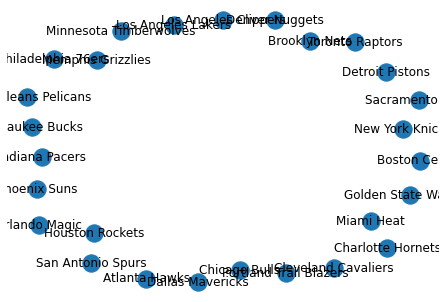

In [485]:
# Add Node for Each NBA Team
G = nx.MultiDiGraph()
for team in teamsSortedSet:
    G.add_node(team)
nx.draw(G, with_labels=True)

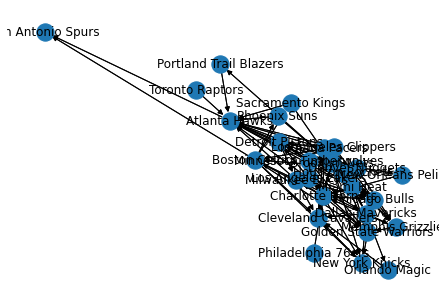

In [486]:
# Add Edges for Each team matchup
i=0
j=0
for team in range(len(teamAdjacencyMatrix)):
    for matchUp in range(team, len(teamAdjacencyMatrix)):
        if(teamAdjacencyMatrix[i][j] > teamAdjacencyMatrix[j][i]):
            G.add_edge(teamsSortedSet[i], teamsSortedSet[j])
        elif(teamAdjacencyMatrix[i][j] < teamAdjacencyMatrix[j][i]):
            G.add_edge(teamsSortedSet[j], teamsSortedSet[i])
        j +=1
        #print(teamAdjacencyMatrix[team][matchUp])
    i +=1
    j=0     
nx.draw(G, with_labels=True)
#teamAdjacencyMatrix

## Resources:
Provided by [Basketball-Reference.com](https://www.sports-reference.com/sharing.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool): [View Original Table](https://www.basketball-reference.com/leagues/NBA_2020_games-november.html?sr&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool#schedule)
Generated 1/13/2022.